### In diesem Notebook schaue ich mir zum ersten Mal den FIFA 21 Spielerdatensatz an. Ich möchte verstehen, wie die Daten aussehen und welche Probleme es vielleicht gibt.

#### Importiere benötigte Bibliotheken

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Daten einlesen

In [101]:
print("Lade den FIFA 21 Datensatz...")
df = pd.read_csv('../data/raw/players_21.csv')

Lade den FIFA 21 Datensatz...


## 2. Erste Informationen über den Datensatz

In [102]:
print("\n=== Basis-Informationen ===")
print(f"Größe des Datensatzes: {df.shape}")
print("\nDie ersten paar Zeilen:")
display(df.head())


=== Basis-Informationen ===
Größe des Datensatzes: (18944, 106)

Die ersten paar Zeilen:


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [103]:
# Spalten anschauen

df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [104]:
# Umbenennung einiger Spaten
df.rename(columns={'height_cm': 'Height', 'weight_kg': 'Weight', 'value_eur': 'Value', 'wage_eur': 'Wage'}, inplace=True)

# Ausgabe des DataFrames nach Umbenennung
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'Height', 'Weight', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)


In [105]:
print("\n=== Basis-Informationen ===")
print(f"Größe des Datensatzes: {df.shape}")
print("\nDie ersten paar Zeilen:")


=== Basis-Informationen ===
Größe des Datensatzes: (18944, 106)

Die ersten paar Zeilen:


## 3. Datentypen und fehlende Werte 

In [106]:
print("\n=== Datentypen und fehlende Werte ===")
print("\nDatentypen der Spalten:")
display(df.dtypes)


=== Datentypen und fehlende Werte ===

Datentypen der Spalten:


sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 106, dtype: object

In [107]:
print("\nFehlende Werte:")
fehlende_werte = df.isnull().sum()
display(fehlende_werte[fehlende_werte > 0])


Fehlende Werte:


club_name                 225
league_name               225
league_rank               225
release_clause_eur        995
player_tags             17536
team_position             225
team_jersey_number        225
loaned_from             18186
joined                    983
contract_valid_until      225
nation_position         17817
nation_jersey_number    17817
pace                     2083
shooting                 2083
passing                  2083
dribbling                2083
defending                2083
physic                   2083
gk_diving               16861
gk_handling             16861
gk_kicking              16861
gk_reflexes             16861
gk_speed                16861
gk_positioning          16861
player_traits           10629
defending_marking       18944
dtype: int64

##  4. Problematische Spalten untersuchen

In [108]:
print("\n=== Untersuchung problematischer Spalten ===")


=== Untersuchung problematischer Spalten ===


#### Größe (Height) anschauen

In [109]:
print("\nBeispiele für Größenangaben:")
display(df['Height'].value_counts().head())


Beispiele für Größenangaben:


Height
180    1487
178    1249
185    1187
183    1151
175    1081
Name: count, dtype: int64

#### Gewicht anschauen

In [110]:
print("\nBeispiele für Gewichtsangaben:")
display(df['Weight'].value_counts().head())


Beispiele für Gewichtsangaben:


Weight
70    1510
75    1458
80    1112
72    1019
78     991
Name: count, dtype: int64

#### Marktwert anschauen

In [111]:
print("\nBeispiele für Marktwerte:")
display(df['Value'].value_counts().head())


Beispiele für Marktwerte:


Value
1100000    459
325000     424
275000     406
350000     390
475000     386
Name: count, dtype: int64

#### Gehalt anschauen

In [112]:
print("\nBeispiele für Gehälter:")
display(df['Wage'].value_counts().head())


Beispiele für Gehälter:


Wage
2000    2943
500     2790
3000    1935
1000    1695
4000    1156
Name: count, dtype: int64

## 5. Kategorische Variablen anschauen

In [113]:
print("\n=== Überblick über kategorische Variablen ===")
kategorische_spalten = df.select_dtypes(include=['object']).columns
for spalte in kategorische_spalten[:5]:  # Zeige die ersten 5
    print(f"\nVerschiedene Werte in {spalte}:")
    display(df[spalte].value_counts().head())


=== Überblick über kategorische Variablen ===

Verschiedene Werte in player_url:


player_url
https://sofifa.com/player/158023/lionel-messi/210002            1
https://sofifa.com/player/237332/alfie-may/210002               1
https://sofifa.com/player/235505/willian-candia/210002          1
https://sofifa.com/player/234912/joel-geissmann/210002          1
https://sofifa.com/player/233463/steffen-lie-skalevik/210002    1
Name: count, dtype: int64


Verschiedene Werte in short_name:


short_name
J. Rodríguez    13
Paulinho         8
M. Smith         7
J. Jones         7
A. González      7
Name: count, dtype: int64


Verschiedene Werte in long_name:


long_name
Liam Kelly       3
Matthew Smith    3
松田 陸             2
Ethan Ross       2
Alfie Jones      2
Name: count, dtype: int64


Verschiedene Werte in dob:


dob
1992-02-29    128
1996-02-29    124
2000-02-29     89
1988-02-29     45
1984-02-29     14
Name: count, dtype: int64


Verschiedene Werte in nationality:


nationality
England      1685
Germany      1189
Spain        1072
France        984
Argentina     936
Name: count, dtype: int64

## 6. Numerische Variablen anschauen

In [114]:
print("\n=== Überblick über numerische Variablen ===")
numerische_spalten = df.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistiken für numerische Variablen:")
display(df[numerische_spalten].describe())


=== Überblick über numerische Variablen ===

Statistiken für numerische Variablen:


,sofifa_id,age,Height,Weight,league_rank,overall,potential,Value,Wage,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,18719.000000,18719.000000,1127.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,20.589668,2021.983332,12.029281,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,17.057568,1.260426,6.674627,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,1.000000,2020.000000,1.000000,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,9.000000,2021.000000,6.000000,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000,43.000000,54.

## 7. Zusammenfassung der Datenproblem

In [115]:
print("\n=== Zusammenfassung der Datenprobleme ===")
probleme = {
    "Größe und Gewicht": "Verschiedene Formate (Fuß/Inches und lbs)",
    "Geldbeträge": "Enthalten Symbole und Abkürzungen (M, K)",
    "Team & Vertrag": "Information muss aufgeteilt werden",
    "Daten": "Müssen einheitlich formatiert werden",
    "Fehlende Werte": "In manchen Spalten",
    "Hits": "Enthalten Zeilenumbrüche"
}

for problem, beschreibung in probleme.items():
    print(f"• {problem}: {beschreibung}")


=== Zusammenfassung der Datenprobleme ===
• Größe und Gewicht: Verschiedene Formate (Fuß/Inches und lbs)
• Geldbeträge: Enthalten Symbole und Abkürzungen (M, K)
• Team & Vertrag: Information muss aufgeteilt werden
• Daten: Müssen einheitlich formatiert werden
• Fehlende Werte: In manchen Spalten
• Hits: Enthalten Zeilenumbrüche


## 8. Erste Visualisierungen


=== Einfache Visualisierungen ===


<Figure size 1000x600 with 0 Axes>

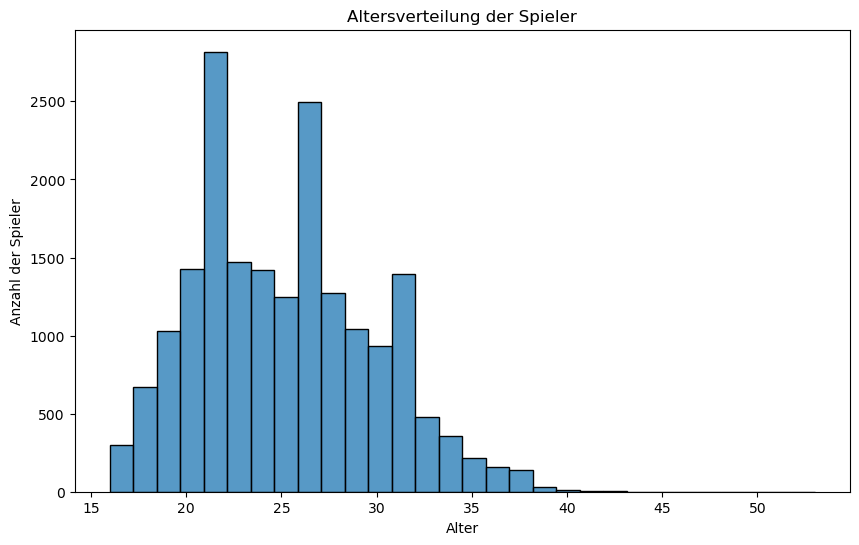

In [117]:
print("\n=== Einfache Visualisierungen ===")

# Altersverteilung
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30)
plt.title('Altersverteilung der Spieler')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Spieler')
plt.show()

## Gesamtbewertungsverteilung

<Figure size 1000x600 with 0 Axes>

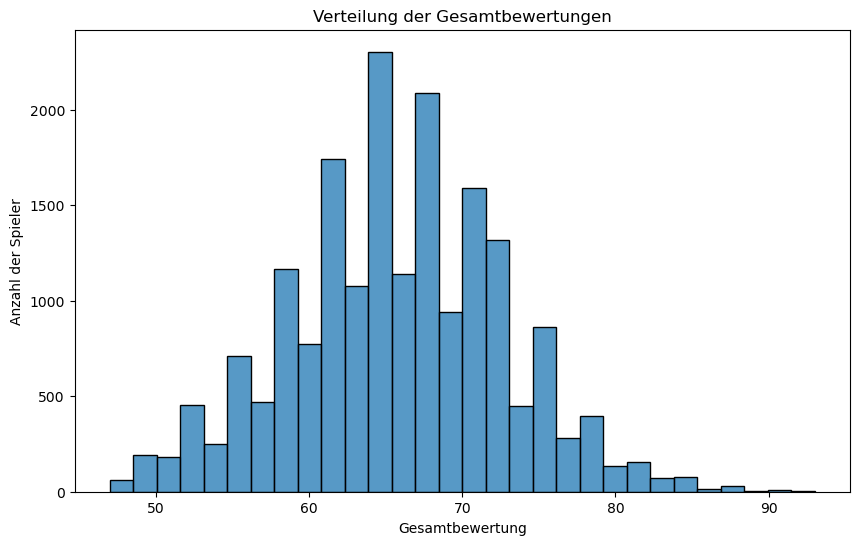

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['overall'], bins=30)
plt.title('Verteilung der Gesamtbewertungen')
plt.xlabel('Gesamtbewertung')
plt.ylabel('Anzahl der Spieler')
plt.show()

## Speicherung der ersten Erkenntnisse

In [120]:
print("\nSpeichere die ersten Erkenntnisse...")
with open('../data/interim/erste_erkenntnisse.txt', 'w') as f:
    f.write("FIFA 21 Datensatz - Erste Erkenntnisse\n")
    f.write(f"Anzahl Datensätze: {len(df)}\n")
    f.write(f"Anzahl Merkmale: {len(df.columns)}\n")
    f.write("\nGefundene Probleme:\n")
    for problem, desc in probleme.items():
        f.write(f"- {problem}: {desc}\n")

print("Fertig! Ich habe mir einen ersten Überblick verschafft und die wichtigsten Probleme identifiziert.")


Speichere die ersten Erkenntnisse...
Fertig! Ich habe mir einen ersten Überblick verschafft und die wichtigsten Probleme identifiziert.
